In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [52]:
df1=pd.read_csv("churn-bigml-20.csv", sep=",") 
df1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


Y ahora los datos del conjunto de Entrenamiento

In [53]:
df2=pd.read_csv("churn-bigml-80.csv", sep=",")
df2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [54]:
df= pd.concat([df1,df2],axis=0)
df.index=pd.Series(range(0,3333)) #se arregla el índice para que valla del 0 al 3332, con el concat se concatenaron los índices
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


# PCA

In [55]:
diccionariocategorico={"Yes":1,"No":0}  #se cambian los yes y no por 0
df=df.replace(diccionariocategorico)

x= df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]  ##Se selecciona las variables que ocuparemos como X
x.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1


In [56]:
diccionariobooleano = {True: 1, False: 0} #para cambiar los True y False, ya que se consideran booleanos
df = df.replace(diccionariobooleano)

y=df.iloc[:,[19]]
y.head()

,Churn
0,0
1,1
2,1
3,0
4,0


In [57]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [58]:
df=df.drop(['State'], axis=1) ###categorica

In [59]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [60]:

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

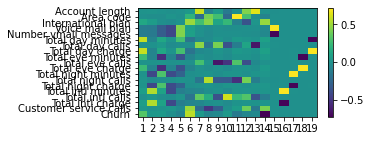

In [61]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.12120305e-01 1.07593252e-01 1.06962202e-01 1.04130891e-01
 1.01755947e-01 6.51215160e-02 5.64414396e-02 5.46185754e-02
 5.32889056e-02 5.18395771e-02 5.10256415e-02 5.07267108e-02
 5.01938546e-02 3.19243286e-02 2.25641623e-03 3.80746909e-07
 4.12110013e-08 1.17429124e-08 2.51186656e-09]


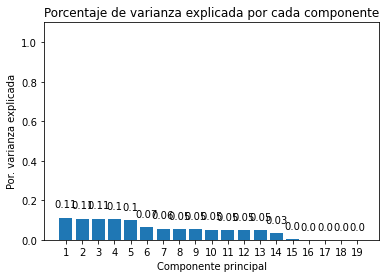

In [62]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.11212031 0.21971356 0.32667576 0.43080665 0.5325626  0.59768411
 0.65412555 0.70874413 0.76203304 0.81387261 0.86489825 0.91562496
 0.96581882 0.99774315 0.99999956 0.99999994 0.99999999 1.
 1.        ]


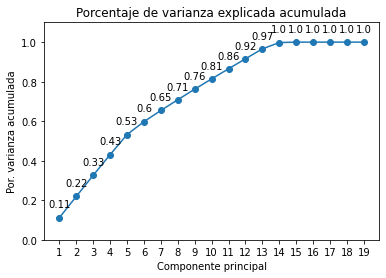

In [63]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [64]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


Por lo tanto, se dejarán solamente las primeras 8 variables (hasta total day charge) ya que las otras variables de totales son lo mismo solo que diferentes horarios (y estos ya se demostró en el analisis de correlacion que tienen correlacion =1), además segun PCA estos no representan significativamente la variabilidad explicada en churn.

Se le suma la variable penultima que es la cantidad de llamadas al serivioc la cliente, ya que es importante.

In [65]:
df=df.drop(["Total eve minutes","Total eve calls","Total eve charge", "Total night minutes","Total night calls",
           "Total night charge","Total intl minutes","Total intl calls","Total intl charge"], axis=1) ###categorica

In [67]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,31.37,1,0
1,65,415,0,0,0,129.1,137,21.95,4,1
2,161,415,0,0,0,332.9,67,56.59,4,1
3,111,415,0,0,0,110.4,103,18.77,2,0
4,49,510,0,0,0,119.3,117,20.28,1,0


#### 6. Separar el conjunto en 70% Entrenamiento y 30% Test (semilla aleatoria).

Primero se seleccionan las variables que se ocuparán como X (no se toma en cuenta los estados ya que son variables categóricas (y apróx 50 estados diferentes) por tanto no aportarán a los clasificadores, además de no poder usar el standard scaler en ellos.

Ahora se separa el conjunto de datos en entrenamiento(70%) y test (30%):

In [81]:
x=df.iloc[:, [0,1,2,3,4,5,6,7,8]] 
y=df.iloc[:,[9]]

In [82]:
x.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Customer service calls
0,117,408,0,0,0,184.5,97,31.37,1
1,65,415,0,0,0,129.1,137,21.95,4
2,161,415,0,0,0,332.9,67,56.59,4
3,111,415,0,0,0,110.4,103,18.77,2
4,49,510,0,0,0,119.3,117,20.28,1


In [83]:
y.head()

,Churn
0,0
1,1
2,1
3,0
4,0


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                test_size=0.3, random_state=1, stratify=y)

In [85]:
X_train.shape

(2333, 9)

In [86]:
X_test.shape

(1000, 9)

In [87]:
y_train.shape

(2333, 1)

In [88]:
y_test.shape

(1000, 1)

#### 7. Estandarizar los atributos utilizando el StandardScaler

Con el fin de que todos los atributos tenga igual importancia al entrenar un clasificador, y debido a que los clasificadores están optimizados para los datos escalados. Procederemos a reescalar los datos.

En particular, el escalamiento que se aplicará es centrar los datos en 0 y cambiar su variabilidad a 1:

$$Z=\frac{X - \overline{X}}{S_{X}}$$

donde $\overline{X}$ corresponde al promedio de los datos y $S_{X}$ a la desviación estándar de los datos de entrada.

Con la función StandardScaler() de la librería sklearn.preprocessing se puede hacer lo anterior:

In [89]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
Z_train = sc.transform(X_train) #tanto el conjunto de entrenamiento como el de test son reescalados
Z_test = sc.transform(X_test)

#### 8. Ajustar los siguientes modelos: LDA, QDA, Árbol de Decisión, Random Forest, Regresión Logística, SVC (lineal y radio basal), Perceptron, Perceptrón Multicapa, K-Neighbors Classifier, Gradient Boosting, XGBoost. Explicar brevemente en qué consiste cada clasificador.

8.1 LDA (Linear Discriminant Analysis)

El LDA es un método de clasificación supervisado en el que dos o más grupos son conocidos a priori y nuevas observaciones se clasifican en uno de ellos en función de sus características. 

Este clasificador ocupa el teorema de Bayes, estimando la probabilidad de que una observación, dado un valor de los predictores, pertenezca a alguna clase.

Además, este clasificador trabaja bajo el supuesto de que las k clases siguen una distribución normal y con una matriz de varianza-covarianza iguales para todas las clases.

Para estimar los parámetros de la distribución a priori se usa el estimador máximo verosímil, siendo:

$$ \widehat{\mu_{k}}=\frac{1}{n_{k}}\sum_{i=1}^{k}X_{i}$$

$$ \widehat{\sum}=\frac{1}{n-K}\sum_{i=1}^{k}\sum_{i=1}^{k}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}$$

Y entonces la función discriminante es:

$$g_{k}(x)=x^{T}(\sum)^{-1}\mu_{k}-\frac{1}{2}\mu_{k}^{T}(\sum)^{-1}\mu_{k}+ln(\lambda_{k})$$

Y la regla de decisión será:

$$d(x)=argmáxg_{k}(x),k=1,..,K$$

Notar que la función discriminante es lineal respecto a X, por eso se le llama "Linear Discriminant Analysis".

Ajustar el modelo en Python es relativamente fácil, siguiendo lo siguiente:

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
ldamodel = lda.fit(Z_train, y_train)

predldamodel=ldamodel.predict(Z_test)

confusion_matrix(y_test, predldamodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[829,  26],
       [105,  40]], dtype=int64)

8.2 QDA (Quadratic Discriminant Analysis)

Este clasificador se asemeja en gran medida al LDA, con la diferencia de que el QDA considera que cada clase k tiene su propia matriz de covarianza (∑k) y, como consecuencia, la función discriminante toma forma cuadrática:

$$g_{k}(x)=-\frac{1}{2}ln|\sum_{k}|-\frac{1}{2}(x-\mu_{k})^{T}\sum_{k}^{-1}(x-\mu_{k})+ln(\mu_{k})$$

Y la regla de clasificación está dada por:

$$d(x)=argmáx(g_{k}x); k=1,..,K$$

Cabe destacar que QDA genera límites de decisión curvos por lo que puede aplicarse a situaciones en las que la separación entre grupos no es lineal.

Para ajustar el modelo en Python se sigue con lo siguiente:

In [91]:
qda = QuadraticDiscriminantAnalysis()
qdamodel = qda.fit(Z_train, y_train)

predqdamodel=qdamodel.predict(Z_test)

confusion_matrix(y_test, predqdamodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[792,  63],
       [ 70,  75]], dtype=int64)

8.3 Árbol de decisión

Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, además de ser un algoritmo de aprendizaje supervisado y pueden realizar tareas de clasificación o regresión. La comprensión de su funcionamiento suele ser simple y a la vez muy potente.

Los árboles de decisión tienen un primer nodo llamado raíz (root) y luego se descomponen el resto de atributos de entrada en dos o más ramas planteando una condición que puede ser cierta o falsa. Se bifurca cada nodo en las ramas y vuelven a subdividirse hasta llegar a las hojas que son los nodos finales y que equivalen a respuestas a la solución: Si/No, Comprar/Vender, o lo que sea que estemos clasificando.

Cabe destacar que, algunas ventajas de este método son por ejemplo: método no paramétrico, por lo que no es necesario hacer supuestos sobre alguna distribución en particular de los datos, además, este método es capáz de seleccionar a los predictores de forma automática, sumando lo anterior, su interpretación es bastante fácil y requiere mucho menos limpieza de datos en relación a otros métodos (por ejemplo, no requiere estandarización), entre otras.

Sin embargo, algunas desventajas de este método son: la capacidad predictiva de los modelos basados en un único árbol es bastante inferior a la conseguida con otros modelos. Esto es debido a su tendencia al overfitting y alta varianza, son sensibles a datos de entrenamiento desbalanceados y cuando tratan con predictores continuos pierte parte de información al categorizarlo en los nodos, entre otras.

Así, el algoritmo en Python crea la mejor opción para el problema, manualmente sería muy costoso de tiempo, pues existen muchísimas combinaciones que pueden ocurrir al tener muchas variables de entrada.

In [92]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(criterion = 'gini', max_depth=4)
arbolmodel=arbol.fit(Z_train, y_train)

predarbolmodel=arbolmodel.predict(Z_test)

confusion_matrix(y_test,predarbolmodel)

array([[808,  47],
       [ 66,  79]], dtype=int64)

8.4 Random Forest

Este método es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. 

Este método trabaja con una combinación de árboles de decisión combinados con bagging. Al usar bagging, distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y se obtiene una predicción que generaliza mejor.

Más específicamente, toma Una muestra de los N casos del conjunto de entrenamiento aleatoriamente pero CON reemplazo. Esta muestra será el conjunto de entrenamiento para construir el árbol i-ésimo. Luego, si existen M varibles de entrada, un número m<M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque. Luego cada árbol crece hasta su máxima extensión posible y genera una clasificación.

Así, cada árbol genera una clasificación y el resultado final será la clase con mayor número de clasificaciones de todo el bosque.

Se destaca que este método es útil tanto para regresión como clasificación, además de que logra que un grupo de modelos débiles sean considerados más robustos, también puede manejar miles de variables de entrada e identificar las más significativas, entre otros.

Algunas desventajas de este modelo es que puede perder interpretación al tener demasiadas variables, además que es bueno para clasificación pero para regresión no tanto debido a que, por ejemplo, en regresión no puede predecir más allá del conjunto de entrenamiento y tiene poco control sobre lo que hace el modelo (caja negra), entre otros.

In [93]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(criterion = 'gini', 
                                 n_estimators=25, n_jobs=2)
randomforestmodel=randomforest.fit(Z_train, y_train)

predrandomforestmodel=randomforestmodel.predict(Z_test)
confusion_matrix(y_test,predrandomforestmodel)

<ipython-input-93-23a58bd9e621>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforestmodel=randomforest.fit(Z_train, y_train)


array([[817,  38],
       [ 75,  70]], dtype=int64)

8.5 Regresión Logística

la regresión logística es un tipo de regresión utilizado para predecir el resultado de una variable categórica (principalmente en variables binarias) en función de las variables predictoras.  El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados que usa como función de enlace la función logit. Las probabilidades que describen el posible resultado de un único ensayo se modelan como una función de variables explicativas, utilizando una función logística.

Debido a que al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, este modelo entraría en contradicción con la definición de la variable respuesta binaria. Por tanto y para evitar estos problemas, la regresión logística transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1. Una de esas funciones es la siguiente (conocida como sigmoide):

$$sigmoide=\frac{1}{1+e^{-y}}$$

Luego, Una vez obtenido las estimaciones de los coeficientes del modelo ( β0,β1,⋯,βp ) se puede obtener la probabilidad de que una nueva observación pertenezca a la clase  y=1  con la ecuación:

$$P(y=1|X=x)=\frac{e^{(b_{0}+b_{1}X_{i}+...b_{p}X_{p})}}{1+e^{(b_{0}+b_{1}X_{i}+...b_{p}X_{p})}}$$

In [94]:
from sklearn.linear_model import LogisticRegression

reglogis = LogisticRegression(C=100.0)
reglogismodel=reglogis.fit(Z_train, y_train)

predreglogismodel=reglogismodel.predict(Z_test)

confusion_matrix(y_test,predreglogismodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[840,  15],
       [117,  28]], dtype=int64)

8.6 SVC lineal

Antes de especificar como funciona el SVC lineal, primero hay recordar la forma general matemática de un hiperplano que está dada por:

$$\beta_{0}+\beta_{1}X_{2}+...+\beta_{p}X_{p}=0$$

Y notar que esta ecuación separa el espacio p-dimensional en 2 mitades, para saber en qué lado del hiperplano se encuentra un determinado punto x, solo hay que calcular el signo de la ecuación. Es decir:

Cuando X no satisface la ecuación:

$$\beta_{0}+\beta_{1}X_{2}+...+\beta_{p}X_{p}<0$$

Y cuando satisface:

$$\beta_{0}+\beta_{1}X_{2}+...+\beta_{p}X_{p}>0$$

Entonces, el SVC (Support Vector Classifier) lineal es un clasificador de aprendizaje supervisado, en donde construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad alto (incluso infinito). Una buena separación entre las clases permitirá una clasificación correcta.

Específicamente, este tipo de algoritmos buscan el hiperplano que tenga la máxima distancia (margen) con los puntos de las diferentes clases. De esta forma, los puntos del vector que son etiquetados con una categoría estarán a un lado del hiperplano y los casos que se encuentren en la otra categoría estarán al otro lado. Así, los vectores de soporte son los puntos que definen el margen máximo de separación del hiperplano que separa las clases.

Además, este método ocupa un kernel (K) que es una función que devuelve el resultado del producto escalar entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Si se obtiene el kernel, también se obtienen directamente los vectores soporte (y el hiperplano) en la dimensión correspondiente al kernel. Ha esto se le suele conocer como kernel trickporque, con solo una ligera modificación del problema original, se puede obtener el resultado para cualquier dimensión. Existen multitud de kernels distintos, para el modelo SVC lineal es:

$$ K(x,x^{´})=x x^{´}$$


In [95]:
from sklearn.svm import SVC

svclineal = SVC(C = 100, kernel = 'linear')
svclinealmodel=svclineal.fit(Z_train, y_train)

predsvclinealmodel=svclinealmodel.predict(Z_test)

confusion_matrix(y_test,predsvclinealmodel)                       

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[855,   0],
       [145,   0]], dtype=int64)

8.7 SVC radio basal

Este algoritmo es un caso especial de los Support Vector Classifier, en donde este método consume más tiempo pero generalmente otorga mejor predicción que el SVC lineal y además es más flexible.

La diferencia matemática entre este método y el lineal es en gran medida a su kernel, siendo el siguiente para el modelo SVC radio basal:

$$ K(x,x^{´})=exp(-\lambda||x-x^{´}||^{2})$$

Notar que el valor de  $\lambda$  controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal y a medida que aumenta su valor, también lo hace la flexibilidad del modelo.

In [96]:
svcrb=SVC(C=100, kernel='rbf')
svcrbmodel=svcrb.fit(Z_train,y_train)

predsvcrbmodel=svcrbmodel.predict(Z_test)

confusion_matrix(y_test,predsvcrbmodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[801,  54],
       [ 75,  70]], dtype=int64)

8.8. Perceptron

El Perceptron es un algoritmo de aprendizaje para tareas de clasificación binaria por lo que nos permite clasificar al conjunto de entradas únicamente dentro de 2 posibilidades y además solo ocupa una capa. En consiguiente, puede clasificarse como uno de los más simples modelos de las redes neuronales artificiales.

Consiste en un único nodo o neurona que toma una fila de datos como entrada y predice una etiqueta de clase. Esto se consigue calculando la suma ponderada de las entradas y un sesgo (establecido en 1). La suma ponderada de la entrada del modelo se denomina activación.

La neurona recibe un conjunto de entradas $(x=x_{1},...x_{m})$ y a cada una se le asocia un peso $(w=w_{1},..,w_{m})$
que les dará un nivel de importancia a cada entrada. Luego se define z como la sumatoria ponderada de cada entrada por su correspondiente peso:

$$z=\sum_{i=1}^{n}w_{i}x_{i}+b$$

Luego, para determinar una salida, se debe definir a z como una función de activación. Por ejemplo, si está por encima de 0, el modelo dará como resultado un 1, de lo contrario, dará 0.

En general, un perceptrón solamente es capaz de trabajar para aquellos casos donde las muestras son linealmente separables, lo que significa que si trazamos una línea, nos queda de un lado un único tipo de muestras y del otro uno diferente.

Como tal, este modelo aprende un límite de decisión que separa dos clases utilizando una línea (llamada hiperplano) en el espacio de características. 

In [97]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=40, eta0=0.1)
perceptronmodel=perceptron.fit(Z_train, y_train)

predperceptronmodel=perceptronmodel.predict(Z_test)

confusion_matrix(y_test,predperceptronmodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[847,   8],
       [142,   3]], dtype=int64)

8.9. Perceptrón Multicapa

El perceptrón multicapa es una red neuronal artificial (RNA) formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables, lo cual es la principal limitación del perceptrón antes mencionado.

La arquitectura del Perceptron multicapa se caracteriza porque tiene sus neuronas agrupadas en capas de diferentes niveles. Cada una de las capas está formada por un conjunto de neuronas y se distinguen tres tipos de capas diferentes: la capa de entrada, las capas ocultas y la capa de salida.

Las neuronas de la capa de entrada no actúan como neuronas propiamente dichas, sino que se encargan únicamente de recibir las señales o patrones del exterior y propagar dichas señales a todas las neuronas de la siguiente capa. La última capa actúa como
salida de la red, proporcionando al exterior la respuesta de la red para cada uno de los
patrones de entrada. Las neuronas de las capas ocultas realizan un procesamiento no lineal de los patrones recibidos.

Generalmente, todas las neuronas de una capa están conectadas a todas las neuronas de la siguiente capa. Se dice entonces que existe conectividad total o que la red está totalmente conectada.

In [98]:
from sklearn.neural_network import MLPClassifier

perceptronmc = MLPClassifier(random_state=1, max_iter=300)
perceptronmcmodel = perceptronmc.fit(Z_train, y_train)

predperceptronmcmodel=perceptronmcmodel.predict(Z_test)

confusion_matrix(y_test,predperceptronmcmodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[815,  40],
       [ 77,  68]], dtype=int64)

8.10. K-Neighbors Classifier

K-Neighbors Classifier es un algoritmo no paramétrico de clasificación de aprendizaje supervisado de Machine Learning. Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

Al ser un algoritmo "Basado en Instancia", esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como “base de conocimiento” para la fase de predicción.

El espacio es particionado en regiones por localizaciones y etiquetas de los ejemplos de entrenamiento. Un punto en el espacio es asignado a alguna clase si esta es la clase más frecuente entre los k ejemplos de entrenamiento más cercano. Generalmente se usa la distancia euclidiana para identificar lo anterior:

$$ d(x_{i},x_{kj})=\sqrt{\sum_{w=1}^{p}(x_{wi}-x_{wj})^{2} }$$

Por tanto, se calcula la distancia entre los vectores almacenados y el nuevo vector, y se seleccionan los k ejemplos más cercanos. El nuevo ejemplo es clasificado con la clase que más se repite en los vectores seleccionados.

Este método supone que los vecinos más cercanos nos dan la mejor clasificación y esto se hace utilizando todos los atributos; el problema de dicha suposición es que es posible que se tengan muchos atributos irrelevantes que dominen sobre la clasificación: dos atributos relevantes perderían peso entre otros veinte irrelevantes. Para arreglar lo anterior es posible darle un "peso" a cada atributo para darle más valor a los más importantes.

In [99]:
from sklearn.neighbors import KNeighborsClassifier

kneighbor = KNeighborsClassifier(n_neighbors=5)
kneighbormodel=kneighbor.fit(Z_train, y_train)

predkneighbormodel=kneighbormodel.predict(Z_test)

confusion_matrix(y_test,predkneighbormodel)

<ipython-input-99-db0c40eaf584>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kneighbormodel=kneighbor.fit(Z_train, y_train)


array([[816,  39],
       [ 91,  54]], dtype=int64)

8.11. Gradient Boosting

Un modelo Gradient Boosting es un método no paramétrico que está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Durante el entrenamiento, los parámetros de cada modelo de árbol son ajustados iterativamente tratando de encontrar el mínimo de una función objetivo, que puede ser la proporción de error en la clasificación, el área bajo la curva (AUC), la raíz del error cuadrático medio (RMSE) o alguna otra.

Este método ocupa el aumento de gradiente, que es un tipo de algoritmo de aumento. Se basa en la intuición de que el mejor modelo siguiente posible, cuando se combina con modelos anteriores, minimiza el error de predicción general. La idea clave es establecer los resultados objetivo para este próximo modelo con el fin de minimizar el error. El aumento de gradiente se puede utilizar tanto para clasificación como para regresión.

Algunas ventajas de este modelo son: capaz de seleccionar predictores de forma automática, no se ve muy influenciado por datos atípicos, no necesita mucha limpieza de datos, si para alguna observación el valor de un predictor no está disponible, a pesar de no poder llegar a ningún nodo terminal, se puede conseguir una predicción empleando todas las observaciones que pertenecen al último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse, entre otras.

Algunas de sus desventajas son: que al combinar múltiples árboles, se pierde la interpretabilidad que tienen los modelos basados en un único árbol, al tratar con predictores continuos se pierde algo de información al categorizarlos, no son capaces de extrapolar fuera del rango de los predictores observados en los datos de entrenamiento, entre otros.

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboos = GradientBoostingClassifier()

gradientboosmodel=gradientboos.fit(Z_train, y_train)

predgradientboosmodel=gradientboosmodel.predict(Z_test)

confusion_matrix(y_test,predgradientboosmodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[826,  29],
       [ 72,  73]], dtype=int64)

8.12. XGBoost

El modelo XGBoost (eXtreme Gradient Boosting) es una implementación de árboles de decisión con Gradient boosting diseñada para minimizar la velocidad de ejecución y maximizar el rendimiento. Este modelo, hoy en día es uno de los más usados en la comunidad científica para clasificar, debido a su alto desempeño y velocidad de trabajo.

Este modelo siguen el mismo principio del aumento de gradiente que el Gradient Boosting. Sin embargo, existen diferencias en los detalles de modelado. Específicamente, XGBoost utiliza una formalización de modelo más regularizada para controlar el sobreajuste, lo que le brinda un mejor rendimiento.

Además, tiene una serie de importantes mejoras de rendimiento en diferentes partes de la implementación que hacen una gran diferencia en la velocidad y la utilización de la memoria que el Gradient Boosting, como por ejemplo: usa matrices dispersas con algoritmos de dispersión, tiene estructura de datos mejoradas para una mejor utilización de la memoria caché de un procesador (hace más rápido su uso) y tiene mejor soporte para el procesamiento multinúcleo que reduce el tiempo total de entrenamiento.

En resumen, es una versión mejorada del Gradient Boosting.

In [108]:
import xgboost as xgb

xgboost = xgb.XGBClassifier()
xgboostmodel=xgboost.fit(Z_train, y_train)

predxgboostmodel=xgboostmodel.predict(Z_test)

confusion_matrix(y_test,predxgboostmodel)

C:\Users\ricar\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[00:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[812,  43],
       [ 65,  80]], dtype=int64)

#### 9. Obtener las métricas de desempeño para todos los clasificadores (Accuracy, Recall, Precision, Specificity, F-measure) y construir una tabla comparativa.

In [109]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [110]:
##Accuracy
acc1=accuracy_score(y_test, predldamodel)
acc2=accuracy_score(y_test, predqdamodel)
acc3=accuracy_score(y_test, predarbolmodel)
acc4=accuracy_score(y_test, predrandomforestmodel)
acc5=accuracy_score(y_test, predreglogismodel)
acc6=accuracy_score(y_test, predsvclinealmodel)
acc7=accuracy_score(y_test, predsvcrbmodel)
acc8=accuracy_score(y_test, predperceptronmodel)
acc9=accuracy_score(y_test, predperceptronmcmodel)
acc10=accuracy_score(y_test,predkneighbormodel)
acc11=accuracy_score(y_test,predgradientboosmodel)
acc12=accuracy_score(y_test,predxgboostmodel)

In [111]:
#Recall
recall1=recall_score(y_test, predldamodel)
recall2=recall_score(y_test, predqdamodel)
recall3=recall_score(y_test, predarbolmodel)
recall4=recall_score(y_test, predrandomforestmodel)
recall5=recall_score(y_test, predreglogismodel)
recall6=recall_score(y_test, predsvclinealmodel)
recall7=recall_score(y_test, predsvcrbmodel)
recall8=recall_score(y_test, predperceptronmodel)
recall9=recall_score(y_test, predperceptronmcmodel)
recall10=recall_score(y_test,predkneighbormodel)
recall11=recall_score(y_test,predgradientboosmodel)
recall12=recall_score(y_test,predxgboostmodel)

In [112]:
## Precisión
prec1=precision_score(y_test, predldamodel)
prec2=precision_score(y_test, predqdamodel)
prec3=precision_score(y_test, predarbolmodel)
prec4=precision_score(y_test, predrandomforestmodel)
prec5=precision_score(y_test, predreglogismodel)
prec6=precision_score(y_test, predsvclinealmodel)
prec7=precision_score(y_test, predsvcrbmodel)
prec8=precision_score(y_test, predperceptronmodel)
prec9=precision_score(y_test, predperceptronmcmodel)
prec10=precision_score(y_test,predkneighbormodel)
prec11=precision_score(y_test,predgradientboosmodel)
prec12=precision_score(y_test,predxgboostmodel)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No se encontró una función de sklearn.metrics para calcular specificity, por lo tanto se hará manualmente mediante la matriz de confusión.
Recordar que:
Specificity=$\frac{VN}{FP+VN}$

Y además, la función confusion_matrix de la librería sklearn entrega la matriz con los resultados al revés, por tanto, se deberá hacer los cálculos manuales al revés también. ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html ) 

In [116]:

cm1=confusion_matrix(y_test, predldamodel)
cm2=confusion_matrix(y_test, predqdamodel)
cm3=confusion_matrix(y_test, predarbolmodel)
cm4=confusion_matrix(y_test, predrandomforestmodel)
cm5=confusion_matrix(y_test, predreglogismodel)
cm6=confusion_matrix(y_test, predsvclinealmodel)
cm7=confusion_matrix(y_test, predsvcrbmodel)
cm8=confusion_matrix(y_test, predperceptronmodel)
cm9=confusion_matrix(y_test, predperceptronmcmodel)
cm10=confusion_matrix(y_test, predkneighbormodel)
cm11=confusion_matrix(y_test,predgradientboosmodel)
cm12=confusion_matrix(y_test,predxgboostmodel)

#specificity
specificity1 = cm1[0,0]/ (cm1[0,0]+cm1[0,1])
specificity2 = cm2[0,0]/ (cm2[0,0]+cm2[0,1])
specificity3 = cm3[0,0]/ (cm3[0,0]+cm3[0,1])
specificity4 = cm4[0,0]/ (cm4[0,0]+cm4[0,1])
specificity5 = cm5[0,0]/ (cm5[0,0]+cm5[0,1])
specificity6 = cm6[0,0]/ (cm6[0,0]+cm6[0,1])
specificity7 = cm7[0,0]/ (cm7[0,0]+cm7[0,1])
specificity8 = cm8[0,0]/ (cm8[0,0]+cm8[0,1])
specificity9 = cm9[0,0]/ (cm9[0,0]+cm9[0,1])
specificity10 = cm10[0,0]/ (cm10[0,0]+cm10[0,1])
specificity11 = cm11[0,0]/ (cm11[0,0]+cm11[0,1])
specificity12 = cm12[0,0]/ (cm12[0,0]+cm12[0,1])

In [117]:
#medida F
f1=f1_score(y_test, predldamodel)
f2=f1_score(y_test, predqdamodel)
f3=f1_score(y_test, predarbolmodel)
f4=f1_score(y_test, predrandomforestmodel)
f5=f1_score(y_test, predreglogismodel)
f6=f1_score(y_test, predsvclinealmodel)
f7=f1_score(y_test, predsvcrbmodel)
f8=f1_score(y_test, predperceptronmodel)
f9=f1_score(y_test, predperceptronmcmodel)
f10=f1_score(y_test,predkneighbormodel)
f11=f1_score(y_test,predgradientboosmodel)
f12=f1_score(y_test,predxgboostmodel)

In [118]:
# TABLA COMPARATIVA:

clasificador=["LDA","QDA", "Arbol de decisión","Random Forest", "Regresión Logís","SVC Lineal","SVC Radio basal",
              "Perceptrón","Perceptrón Multicapa","K-neighbors","Gradient Boosting","XGBoost"]

accuracy=[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,acc11,acc12]

recall=[recall1,recall2,recall3,recall4,recall5,recall6,recall7,recall8,recall9,recall10,recall11,recall12]

precision=[prec1,prec2,prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12]

specificity=[specificity1,specificity2,specificity3,specificity4,specificity5,specificity6,specificity7,specificity8,
            specificity9,specificity10,specificity11,specificity12]

fscore=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12]

pd.DataFrame({"Clasificador": clasificador,"Accuracy":accuracy,"Recall":recall, "Precisión":precision,
              "Especificidad":specificity, "Medida F":fscore
             })

,Clasificador,Accuracy,Recall,Precisión,Especificidad,Medida F
0,LDA,0.869,0.275862,0.606061,0.969591,0.379147
1,QDA,0.867,0.517241,0.543478,0.926316,0.530035
2,Arbol de decisión,0.887,0.544828,0.626984,0.945029,0.583026
3,Random Forest,0.887,0.482759,0.648148,0.955556,0.553360
4,Regresión Logís,0.868,0.193103,0.651163,0.982456,0.297872
5,SVC Lineal,0.855,0.000000,0.000000,1.000000,0.000000
6,SVC Radio basal,0.871,0.482759,0.564516,0.936842,0.520446
7,Perceptrón,0.850,0.020690,0.272727,0.990643,0.038462
8,Perceptrón Multicapa,0.883,0.468966,0.629630,0.953216,0.537549
9,K-neighbors,0.870,0.372414,0.580645,0.954386,0.453782


#### 10. Discutir los resultados obtenidos.

Según los resultados obtenidos, se puede apreciar que según la métrica de desempeño Accuracy los 3 clasificadores que tuvieron un mejor porcentaje del total de elementos clasificados correctamente del total de clasificaciones, fueron el Random Forest, Gradient Boosting y el XGBoost, teniendo un gran porcentaje lo que indica un buen ajuste. Mientras los que tuvieron peor evaluación son el Perceptrón, SVC Lineal y el LDA.

En consiguiente, según el recall que mide la capacidad del clasificador de poder detectar correctamente los casos positivos, los mejores clasificadores fueron nuevamente los mismos, el Random Forest, el Gradient Boosting y el XGBoost, mientras que los peores evaluados en este ítem son el LDA, Regresión Logística  (estos dos por muchísimo, solo obtuvieron un porcentaje menor al 30%) y también el SVC Lineal.

Según la precisión, que mide la probabilidad de que si una instancia x es clasificada en la clase c, la instancia realmente pertenece a esa clase, los mejores evaluados son nuevamente el Random Forest, Gradient Boosting y el XGBoost, mientras que los peores evaluados son nuevamente el LDA, el Perceptrón (por mucho, solo un 30%) y el QDA.

Según la especificidad, que mide la capacidad del clasificador de poder detectar correctamente los casos negativos, los mejores evaluados fueron el SVC Lineal (tuvo desempeño perfecto), Gradient Boosting, el XGBoost y el Random Forest nuevamente, sin embargo, en general todos tuvieron buenos resultados en esta métrica.

Finalizando, según la medida F que indica la media armónica entre la precisión y el recall, los que tuvieron mejor evaluación fueron nuevamente el Random Forest, Gradient Boosting y el XGBoost, mientras que los peores evaluados son el LDA, SVC Lineal y la Regresión Logística.

#### 11. Conclusión

En conclusión, se puede decir que en general el modelo Gradient Boosting fue por poco el que mejor se adaptó a la base de datos para poder clasificar, debido a que en la mayoría de las métricas de desempeño fue el mejor evaluado. Seguido por el XGBoost y en tercer lugar el Random Forest. Se destaca que el XGBoost al ser un versión mejorada del Gradient Boosting, no pudo obtener mejores métricas de desempeño que el Gradient Boosting.

Además, se obtuvo clasificadores que son bastante buenos para detectar correctamente los casos verdaderos positivos, como el Random Forest y el árbol de decisión, pero estos no son tan buenos clasificadores para detectar los casos verdaderos negativos, lo que produce diferencias importantes en las diferentes métricas.

Por otro lado, clasificadores como el LDA, SVC Radio Basal y el Perceptrón Multicapa si tuvieron buen desempeño para detectar verdaderos negativos, sin embargo, no tan buen desempeño para detectar los verdaderos positivos.

Entonces, si se tuviera que elegir un clasificador para un estudio sobre esta base de datos y las variables elegidas, se debería tomar como clasificador preferente el Gradient Boosting.

#### 12. Referencias


Amat, Joaquín. (2020). Máquinas de Vector Soporte (SVM) con Python. https://www.cienciadedatos.net/documentos/py24-svm-python.html

Amat, Joaquín. (2020). Gradient Boosting con Python. https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html

Borja-Robalino, Ricardo & et al. (2020). Estandarización de métricas de rendimiento para
clasificadores Machine y Deep Learning. *Revista Ibérica de Sistemas e Tecnologías de Informação, 30, 184-196.*
https://www.researchgate.net/profile/Antonio-Monleon-Getino/publication/342009715_Estandarizacion_de_metricas_de_rendimiento_para_clasificadores_Machine_y_Deep_Learning/links/5ede3d0392851cf13869078e/Estandarizacion-de-metricas-de-rendimiento-para-clasificadores-Machine-y-Deep-Learning.pdf

Guarneros-Rivera, Manuel & et al. (2017). Reconocimiento de patrones en gráficos de control utilizando una red neuronal. *Revista de Tecnología Informática, 1(2), 1-8.* https://www.ecorfan.org/spain/researchjournals/Tecnologia_Informatica/vol1num2/Revista_de_Tecnologia_Informatica_V1_N2.pdf#page=16

Mejías César, Yuleidys & et al. (2013). Funciones de transferencia en el perceptrón multicapa: efecto de su combinación en entrenamiento local y distribuido. *Revista Cubana de Informática Médica, 5(2), 186-199.* http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S1684-18592013000200009&lng=es&tlng=es